# PROJECT: MELBOURNE HOUSING MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 1:**
1. CAO VĂN PHÚC - 18120509
2. PHAN VĂN VÕ QUYỀN - 18120529

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `Melbource housing market`, tập dữ liệu này thu thập thông tin về dữ liệu nhà đất tại thành phố Melbource xinh đẹp của nước Úc, nó bao gồm các thuộc tính Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale và distance từ C.B.D. Tập dữ liệu này được lấy từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/anthonypino/melbourne-housing-market), license của dữ liệu tại [đây](https://creativecommons.org/licenses/by-nc-sa/4.0/)  
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng  
- Tập dữ liệu này được người ta thu thập bằng các kết quả có sẵn công khai hằng tuần từ trang `Domain.com.au`
- Trong đồ án này, nhóm xin được phép chỉ sử dụng file `MELBOURNE_HOUSE_PRICES_LESS.csv`

## Khám phá dữ liệu

### Đọc dữ liệu từ file.csv vào DataFrame

In [2]:
mhm_df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
mhm_df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
36495,Highett,12 Highland Av,4,h,NaN,VB,Buxton,18/08/2018,3190,Southern Metropolitan,4794,16.0,Bayside City Council
48874,Aberfeldie,435 Buckley St,3,h,1210000.0,S,Nelson,24/06/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
53572,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,3023,Western Metropolitan,1607,14.8,Melton City Council
36659,South Yarra,401/101 River St,3,u,1550000.0,S,Jellis,18/08/2018,3141,Southern Metropolitan,14887,2.7,Melbourne City Council
19778,Mulgrave,53 Haverbrack Dr,4,h,920000.0,PI,Barry,10/12/2016,3170,South-Eastern Metropolitan,7113,18.8,Monash City Council
17689,Malvern East,1445 Dandenong Rd,3,h,NaN,PI,Buxton,9/12/2017,3145,Southern Metropolitan,8801,8.4,Stonnington City Council
53469,Ashburton,59 Winton Rd,3,h,2550000.0,S,Marshall,26/08/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
41676,St Kilda,31 Redan St,6,h,NaN,PI,hockingstuart,21/10/2017,3182,Southern Metropolitan,13240,5.0,Port Phillip City Council
43550,Preston,16 Josephine Gr,2,h,1088000.0,S,Barry,22/08/2016,3072,Northern Metropolitan,14577,8.4,Darebin City Council
20697,Keilor Downs,2/21 Aquanita Cr,3,t,575000.0,S,Barry,11/08/2018,3038,Western Metropolitan,3656,15.5,Brimbank City Council


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Số dòng, số cột sẽ lần lượt lưu vào hai biến num_rows và num_cols

In [3]:
num_rows, num_cols = mhm_df.shape
print(num_rows, num_cols)

63023 13


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng cung cấp thông tin về một ngôi nhà ở Melbourne

### Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows = mhm_df.duplicated().sum()
have_duplicated_rows

2

### Vấn đề cần xử lý
- Có dòng bị lặp, cần loại bỏ các dòng đó

## Tiền xử lý

### Loại bỏ dòng dữ liệu bị lặp

In [5]:
mhm_df = mhm_df.drop_duplicates()
mhm_df.shape

(63021, 13)

Sau khi loại bỏ dòng lặp, thì mhm_df còn đúng 63021 dòng dữ liệu

## Khám phá dữ liệu (tiếp tục)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu trên trang `Kaggle`
- Suburb: ngoại ô
- Address: địa chỉ cụ thể của ngôi nhà
- Rooms: số phòng của ngôi nhà
- Price: giá của ngôi nhà, tính bằng đô la Úc
- Method:
    - S - tài sản đã bán
    - SP - tài sản đã bán trước đó
    - PI - tài sản được chuyển vào
    - PN - bán trước không được tiết lộ
    - SN - bán không được tiết lộ
    - NB - không có giá thầu
    - VB - giá thầu của nhà cung cấp
    - W - thu hồi trước khi đấu giá
    - SA - bán sau khi đấu giá
    - SS - giá bán sau đấu giá không được tiết lộ
    - N / A - giá hoặc giá thầu cao nhất không có sẵn
- Type:
    - br - phòng ngủ
    - h - nhà, biệt thự, sân thượng
    - u - nhà đơn, nhà hai tầng
    - t - nhà phố
    - dev site - nhà có vị trí phát triển
    - o res - khu dân cư khác
- Postcode: mã bưu điện
- SellerG: Đại lý bất động sản
- Date: Ngày bán
- Distance: Khoảng cách từ CBD tính bằng Kilômét
- RegionName: Khu vực chung (Tây, Tây Bắc, Bắc, Đông Bắc… vv)
- Propertycount: Số lượng thuộc tính tồn tại ở vùng ngoại ô
- CouncilArea: Hội đồng quản lý khu vực

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
mhm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63021 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63021 non-null  object 
 1   Address        63021 non-null  object 
 2   Rooms          63021 non-null  int64  
 3   Type           63021 non-null  object 
 4   Price          48432 non-null  float64
 5   Method         63021 non-null  object 
 6   SellerG        63021 non-null  object 
 7   Date           63021 non-null  object 
 8   Postcode       63021 non-null  int64  
 9   Regionname     63021 non-null  object 
 10  Propertycount  63021 non-null  int64  
 11  Distance       63021 non-null  float64
 12  CouncilArea    63021 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.7+ MB


Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu. Do đó tiền hành code hàm open_object_dtype trả về tập các kiểu dữ liệu có ở trong các cột

In [7]:
def open_object_dtype(s):
    dtypes = set(s.map(type))
    return dtypes

In [8]:
obj_cols = mhm_df.select_dtypes(["object"]).columns
data = obj_cols.map(lambda x: open_object_dtype(mhm_df[x]))
pd.Series(data=data, index = obj_cols)

Suburb         {<class 'str'>}
Address        {<class 'str'>}
Type           {<class 'str'>}
Method         {<class 'str'>}
SellerG        {<class 'str'>}
Date           {<class 'str'>}
Regionname     {<class 'str'>}
CouncilArea    {<class 'str'>}
dtype: object

**Vấn đề cần tiền xử lí:**
- Cột `Date` đang có kiểu dữ liệu là `str`, để khám phá thêm cột này ta sẽ phải chuyển nó về dạng `datetime`

## Tiền xử lý

In [9]:
mhm_df['Date'] = pd.to_datetime(mhm_df['Date'], format = '%d/%m/%Y')
mhm_df['Date'].dtypes

dtype('<M8[ns]')

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột dữ liệu numeric, các giá trị được phân bố như thế nào?

Chúng ta xếp cột `Date` vào cột dạng numeric. Như vậy có vẻ có tổng cộng 6 cột dạng numeric, đó là `Date` `Rooms`, `Price`, `Postcode`, `Propertycount` và `Distance`. Tuy nhiên cột `Postcode` thực chất là dạng categorical, vì mã bưu điện thì được đánh dưới dạng số. Vậy số cột numeric thực sự là `Date`, `Rooms`, `Price`, `Propertycount` và `Distance`  

Với mỗi cột numeric, ta sẽ tính tỉ lệ phần trăm giá trị bị thiếu (từ 0 đến 100), min và max. Kết quả được lưu vào dataframe `nume-col_profiles_df`

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["Date", "Rooms", "Price", "Propertycount", "Distance"]

def missing_ratio(s):
    return s.isnull().mean() * 100

nume_col_profiles_df = mhm_df[nume_cols].agg([missing_ratio, 'min', 'max'])
nume_col_profiles_df

,Date,Rooms,Price,Propertycount,Distance
missing_ratio,0,0,23,0,0
min,2016-01-28 00:00:00,1,"85,000",39,0
max,2018-10-13 00:00:00,31,"11,200,000","21,650",64


Cột `Price` có phần trăm giá trị bị thiếu là 23%, điều này không nằm ngoài dự tính bởi lẽ như trong file mô tả có nói, cột `Method` sẽ cho chúng ta biết được phương thức bán nhà, với các phương thức "PN", "SN", ... thì giá nhà sẽ không được công khai. Do đó với các giá trị thiếu này ta sẽ không loại bỏ chúng. Với các giá trị min có lẽ không có gì bất thường. Nhưng với giá trị max chúng ta có thể thấy ngôi nhà có số phòng nhiều nhất lên đến 31 phòng, ngôi nhà có giá cao nhất lên đến 11,200,000 đô Úc (tức là khoảng 160 tỉ VND), chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không? 

In [11]:
rooms_value_counts = pd.DataFrame(mhm_df['Rooms'].value_counts())
rooms_value_counts.columns = ['Num of houses']
rooms_value_counts

,Num of houses
3,27949
4,15747
2,13247
5,3434
1,2111
6,424
7,61
8,29
10,7
9,5


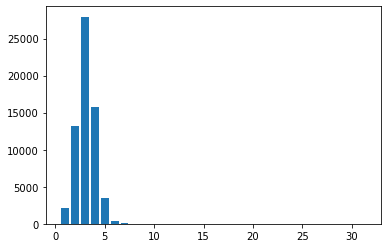

In [12]:
plt.bar(rooms_value_counts.index, rooms_value_counts['Num of houses']);

Theo quan sát thì chúng ta có thể nhận thấy rằng những ngôi nhà có nhiều hơn 7 phòng đã là rất hiếm, vì thế ngôi nhà có 31 phòng thực sự là điều kì lạ. Chúng ta không thể khẳng định chắc chắn được là liệu có hay không căn nhà với 31 phòng, hay đây là sai sót trong quá trình nhập liệu, vì thế mà ta sẽ không bỏ đi chúng, chỉ tiến hành khám phá và coi nó như một giá trị ngoại lệ

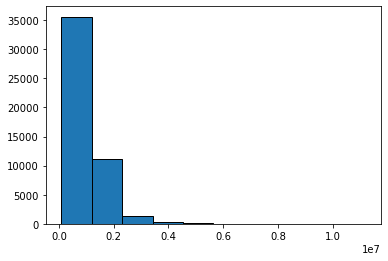

In [13]:
plt.hist(mhm_df['Price'], edgecolor='black');

In [14]:
len(mhm_df[mhm_df['Price'] > 5000000])

73

Theo quan sát, các ngôi nhà có giá trên 5,000,000 đô la Úc thực sự chiếm tỉ lệ rất ít, tuy nhiên chúng ta cũng không thể khẳng định được liệu căn nhà có giá 11,200,000 có thật hay không hay là do sai sót trong quá trình nhập liệu, thực tế thì vẫn có các siêu biệt thự dành cho giới nhà giàu. Do đó, ta sẽ giữ lại các giá trị này, chỉ tiến hành khám phá chúng và xem như những giá trị ngoại lệ hay giá trị đặc biệt

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

mhm_df có tổng cộng 8 cột dữ liệu dạng categorical là `Suburb`, `Address`, `Type`, `Method`, `SellerG`, `Regionname`, `CouncilArea`, `Postcode`  

Với mỗi cột categorical, ta tiến hành tính phần trăm giá trị bị thiếu (từ 0 đến 100), tính số lượng giá trị khác nhau, list/array các giá trị khác nhau. Kết quả sẽ được lưu vào dataframe `cate_col_profiles_df`

In [15]:
cate_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea', 'Postcode']
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.unique()

cate_col_profiles_df = mhm_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,Suburb,Address,Type,Method,SellerG,Regionname,CouncilArea,Postcode
missing_ratio,0,0,0,0,0,0,0,0
num_diff_vals,380,57754,3,9,476,8,34,225
diff_vals,"[Abbotsford, Aberfeldie, Airport West, Albanva...","[49 Lithgow St, 59A Turner St, 119B Yarra St, ...","[h, t, u]","[S, SP, PI, SN, VB, PN, SA, W, SS]","[Jellis, Marshall, Nelson, Barry, hockingstuar...","[Northern Metropolitan, Western Metropolitan, ...","[Yarra City Council, Moonee Valley City Counci...","[3067, 3040, 3042, 3021, 3206, 3020, 3078, 301..."


### Làm rõ hơn ý nghĩa của cột `Suburb` và `CouncilArea`

Theo mô tả của file dữ liệu thì:
- Suburb: mô tả ngoại ô, nơi mà ngôi nhà tọa lạc
- CouncilArea: hội đồng quản lí của khu vực  

Ở Úc, chính quyền địa phương là cấp hành chính thấp nhất, nằm dưới tiểu bang và liên bang. Cơ quan quyền lực nhà nước đóng trên địa phương được gọi là hội đồng. Khác với Việt Nam, mỗi phường, xã, thị trấn (đơn vị hành chính nhỏ nhất ở nước ta) đều tồn tại một Hội đồng Nhân dân, ở Úc lại không chia nhỏ ra như vậy, mỗi hội đồng bao gồm nhiều suburb,do đó mà ở Úc chỉ có 565 chính quyền địa phương mà thôi. Bây giờ trước tiên chúng ta sẽ cùng xem thử mỗi hội đồng ở trong dữ liệu này bao gồm những suburb nào

In [16]:
pd.set_option("display.max_colwidth", 1000)
su_in_ca_df = mhm_df[['Suburb', 'CouncilArea']]
su_in_ca_df = su_in_ca_df.groupby(['CouncilArea'])['Suburb'].apply(set)
su_in_ca_df = pd.DataFrame(su_in_ca_df)
su_in_ca_df.head()

,Suburb
CouncilArea,
Banyule City Council,"{Heidelberg Heights, Ivanhoe East, Bellfield, Heidelberg, Montmorency, Viewbank, Eaglemont, Ivanhoe, St Helena, Heidelberg West, Bundoora, Watsonia, Watsonia North, Briar Hill, Rosanna, Eltham, Macleod, Greensborough, Eltham North, Yallambie, Lower Plenty, viewbank, MacLeod}"
Bayside City Council,"{Hampton, Brighton East, Highett, Beaumaris, Hampton East, Cheltenham, Black Rock, Sandringham, Brighton}"
Boroondara City Council,"{Kew East, Kew, Hawthorn, Balwyn, Deepdene, Mont Albert, Canterbury, Hawthorn East, Surrey Hills, Camberwell, Ashburton, Balwyn North, Glen Iris}"
Brimbank City Council,"{Keilor Park, Albanvale, Albion, Sydenham, Deer Park, Sunshine West, Sunshine, Keilor Downs, Delahey, Kealba, Kings Park, Hillside, Derrimut, Cairnlea, Keilor, Brooklyn, Tullamarine, Keilor Lodge, Taylors Lakes, Sunshine North, St Albans, Ardeer, Keilor East}"
Cardinia Shire Council,"{Beaconsfield Upper, Officer, Gembrook, Beaconsfield, Emerald, Guys Hill, Pakenham, Cockatoo, Menzies Creek, Avonsleigh}"


Theo [wikipedia](https://vi.wikipedia.org/wiki/Ch%C3%ADnh_quy%E1%BB%81n_%C4%91%E1%BB%8Ba_ph%C6%B0%C6%A1ng_%E1%BB%9F_%C3%9Ac) mặc dù chính quyền địa phương ở Úc được phân chia khá đơn giản, nhưng một vài khu vực địa lý khá rộng và có ít dân lại không trực thuộc cấp chính quyền cơ sở nào cả. Nhiệm vụ của chính quyền địa phương ở những khu vực này thường do các tổ chức, cơ quan đặc trách ngoài chính quyền đảm nhận (như các khu nghỉ mát trên núi ở bang Victoria), hoặc do nhà chức trách tiểu bang cai quản toàn bộ. Như vậy chúng ta thử kiểm tra xem liệu có sự đụng độ suburb nào ở các chính quyền địa phương hay không 

In [17]:
su_in_ca_df = su_in_ca_df.explode('Suburb')
su_in_ca_df.duplicated().sum()

0

Như chúng ta quan sát, đã không có sự nhập nhằng nào trong việc quản lí, như vậy người dùng dễ dàng hơn trong việc làm giấy tờ nhà hay đơn giản hơn là việc đặt hàng online chẳng hạn (có thể có, vì KTX B ĐHQG là một ví dụ trong sự nhập nhằng địa chỉ 😉, nhập nhằng ở đây là theo cách hiểu của người nhập liệu, người dân, hiển nhiên trên giấy tờ quốc gia, một vùng vẫn luôn được thống nhất)

## Đưa ra câu hỏi cần trả lời

Sau khi khám phá và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:
- ***Câu 1: Giá nhà (`Price`) thay đổi như thế nào nếu khoảng cách (`Distance`) thay đổi?***
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được khoảng cách chi phối như thế nào đến giá nhà, từ đó lựa chọn mua cho hợp lí, có thể chấp nhận được mức khoảng cách nào để tối thiểu được giá nhà
- ***Câu 2: Đâu là top 5 nhân viên seller (`SellerG`) rao bán được nhiều nhà nhất trong mỗi năm?***
    - Thường thì con người ta sẽ có niềm tin vào số đông nhiều hơn, do vậy mà họ cũng sẽ khá là tin rằng nhân viên nào rao bán được nhiều nhà hơn thì sẽ uy tín hơn, do đó mà việc thống kê top 5 nhân viên mỗi năm sẽ giúp cho người mua có lựa chọn phù hợp với bản thân

## Tiền xử lý

Đầu tiên, thêm cột thuộc tính `Month` và `Year` vào dataframe mhm_df

In [18]:
mhm_df['Month'] = mhm_df['Date'].dt.month
mhm_df['Year'] = mhm_df['Date'].dt.year
mhm_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Month,Year
0,Abbotsford,49 Lithgow St,3,h,"1,490,000",S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
1,Abbotsford,59A Turner St,3,h,"1,220,000",S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
2,Abbotsford,119B Yarra St,3,h,"1,420,000",S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
3,Aberfeldie,68 Vida St,3,h,"1,515,000",S,Barry,2017-04-01,3040,Western Metropolitan,1543,8,Moonee Valley City Council,4,2017
4,Airport West,92 Clydesdale Rd,2,h,"670,000",S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10,Moonee Valley City Council,4,2017


## Phân tích dữ liệu để trả lời câu hỏi

### Câu 1: Giá nhà thay đổi như thế nào khi khoảng cách thay đổi?

Để trả lời được câu hỏi này chúng ta cần thực hiện như sau:
- Tạo dataframe distance_price_df từ mhm_df với hai cột `Price` và `Distance`
- Vì khoảng cách có tới 180 giá trị riêng biệt, đồng thời nhiều khoảng cách lại mang ý nghĩa khá tương đồng nhau, chẳng hạn 10 km với 10,1 km sẽ không có gì thay đổi nhiều trong suy nghĩ của người mua nhà, do đó chúng ta tiến hành chia bin cho khoảng cách, với độ rộng mỗi bin là 3 (3 là ngưỡng mà nhóm đặt ra, xem như là ngưỡng có thể chấp nhận được khi khoảng cách thay đổi), dùng hàm cut trong pandas để phân đoạn và xếp từng giá trị `Price` vào cột mới `Bins`
- Tính trung bình giá nhà theo từng `Bins`
- Để vẽ được biểu đồ ta cần thêm cột `Bins_average` là giá trị trung bình của biên trái và biên phải của mỗi bin, nhằm đại diện cho bin đó, vì cột `Bins` hiện tại đang ở dạng categorical
- Vẽ biểu đồ đường để xem sự thay đổi của giá nhà khi khoảng cách thay đổi, trục hoành là giá trị trong `Bins_average` đặt tên lại là 'Distance', trục tung là `Price`

In [19]:
distance_price_df = mhm_df[['Price', 'Distance']]
distance_price_df.head()

,Price,Distance
0,"1,490,000",3
1,"1,220,000",3
2,"1,420,000",3
3,"1,515,000",8
4,"670,000",10


In [20]:
bins = np.arange(0, distance_price_df['Distance'].max() + 3, 3)
bins

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
       39., 42., 45., 48., 51., 54., 57., 60., 63., 66.])

In [21]:
distance_price_df['Bins'] = pd.cut(distance_price_df['Distance'], bins)
distance_price_df.head()

<ipython-input-21-fe969ddf4276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_price_df['Bins'] = pd.cut(distance_price_df['Distance'], bins)


,Price,Distance,Bins
0,"1,490,000",3,"(0.0, 3.0]"
1,"1,220,000",3,"(0.0, 3.0]"
2,"1,420,000",3,"(0.0, 3.0]"
3,"1,515,000",8,"(6.0, 9.0]"
4,"670,000",10,"(9.0, 12.0]"


In [22]:
distance_price_df = pd.DataFrame(distance_price_df.groupby(['Bins'])['Price'].mean())
distance_price_df.head()

,Price
Bins,
"(0.0, 3.0]","1,167,598"
"(3.0, 6.0]","1,151,683"
"(6.0, 9.0]","1,153,413"
"(9.0, 12.0]","1,069,961"
"(12.0, 15.0]","942,017"


In [23]:
pd.options.display.float_format = '{:,.2f}'.format
distance_price_df['Bins_average'] = np.arange(1.5, 66, step=3.0)
distance_price_df.head()

,Price,Bins_average
Bins,,
"(0.0, 3.0]","1,167,598.32",1.50
"(3.0, 6.0]","1,151,683.35",4.50
"(6.0, 9.0]","1,153,412.62",7.50
"(9.0, 12.0]","1,069,961.42",10.50
"(12.0, 15.0]","942,016.53",13.50


In [24]:
tmp = distance_price_df[['Bins_average', 'Price']]
tmp = tmp.set_index('Bins_average')
tmp

,Price
Bins_average,
1.50,"1,167,598.32"
4.50,"1,151,683.35"
7.50,"1,153,412.62"
10.50,"1,069,961.42"
13.50,"942,016.53"
16.50,"944,713.42"
19.50,"680,408.95"
22.50,"878,982.81"
25.50,"705,164.78"


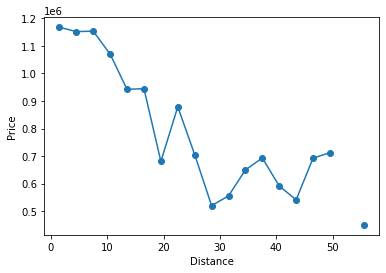

In [25]:
plt.plot(tmp, marker='o')
plt.xlabel('Distance')
plt.ylabel('Price');

Như vậy nhìn qua biểu đồ chúng ta có thể nhận thấy một xu hướng chung đó là khoảng cách càng xa thì giá nhà càng giảm, một số ngoại lệ thì có lẽ do nhiều yếu tố khác chi phối. Biểu đồ sẽ tồn tại những điểm không có đoạn nối đó là do khi chia bin có một số khoảng cách không có, hoặc là do theo như file mô tả khoảng cách trong bin đó thì giá nhà không được công khai

### Câu 2: Đâu là top 5 nhân viên seller rao bán được nhiều nhà nhất trong mỗi năm?

Để trả lời được câu hỏi này, chúng ta cần thực hiện như sau:
- Tạo dataframe seller_df với ba cột `Year`, `SellerG` và `Count`, trong đó cột `Count` là số lượng nhà được rao bán của mỗi nhân viên trong mỗi năm
- Tạo dataframe top5_seller_df lấy top 5 nhân viên rao bán được nhiều nhà nhất trong mỗi năm

In [27]:
seller_df = mhm_df[['Year', 'SellerG']]
seller_df = pd.DataFrame(seller_df.groupby(['Year', 'SellerG']).size())
seller_df.columns = ['Count']
seller_df

Count
Year SellerG                           
2016 @Realty                          3
     ASL                              6
     Abercromby's                    19
     Abley                            3
     Airport                          1
...                                 ...
2018 hockingstuart/hockingstuart      4
     iHomes                           2
     iSell                           26
     iTRAK                           18
     voglwalpole                      4

[957 rows x 1 columns]

In [28]:
top5_seller = seller_df['Count'].groupby('Year', group_keys=False)
top5_seller_df = pd.DataFrame(top5_seller.nlargest(5))
top5_seller_df

Count
Year SellerG             
2016 Barry           2012
     Jellis          1361
     hockingstuart   1352
     Nelson          1290
     Ray             1268
2017 Barry           2854
     Jellis          2130
     Nelson          1898
     Ray             1841
     hockingstuart   1830
2018 Barry           2028
     Jellis          2007
     Nelson          1551
     Ray             1445
     hockingstuart   1150

Theo như quan sát trên `top5_seller_df` thì Barry là nhân viên rao bán nhiều nhà nhất trong ba năm liên tiếp, có lẽ người mua nên suy nghĩ mua nhà do nhân viên này giới thiệu 😉